In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#1 - Dilatación

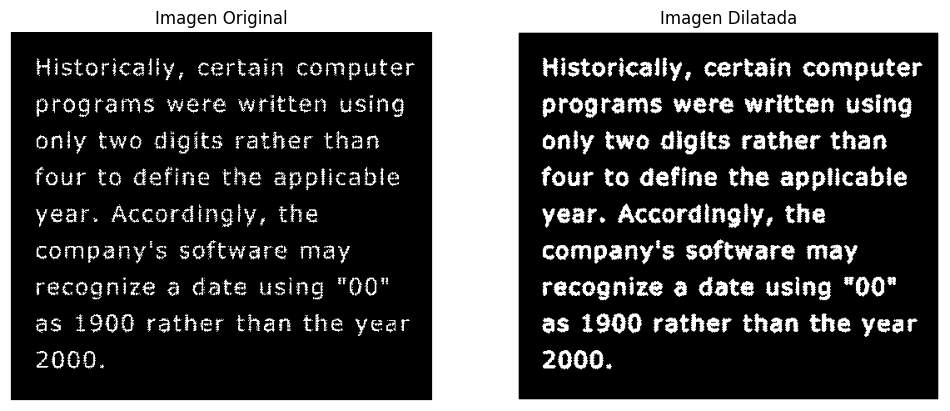

In [ ]:
broken_text = cv2.imread('Broken_Text.tif', 0)
kernel = np.array([[0,1,0],[1,1,1],[0,1,0]], np.uint8)
imagen_dilatada = cv2.dilate(broken_text, kernel, iterations=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(broken_text, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen Dilatada')
plt.imshow(imagen_dilatada, cmap='gray')
plt.axis('off')
plt.show()

#2 - Erosión

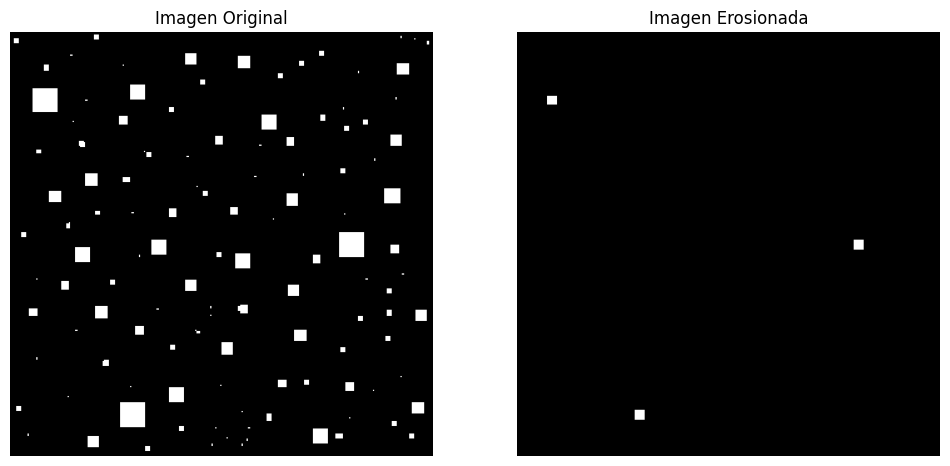

In [ ]:
noisy_squares = cv2.imread('Noisy_Squares.tif', 0)
kernel = np.ones((13,13), np.uint8)
squares = cv2.erode(noisy_squares, kernel, iterations=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(noisy_squares, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen Erosionada')
plt.imshow(squares, cmap='gray')
plt.axis('off')
plt.show()

#3 - Apertura
Ejecutar para ver animacion

In [ ]:
!pip install ipywidgets
from ipywidgets import interact, widgets
import cv2
import matplotlib.pyplot as plt

In [ ]:
b = cv2.imread('Elementob.png', cv2.IMREAD_GRAYSCALE)

def actualizar_slider(radio):
    print(f'Valor del slider: {radio}')
    radio=int(radio)

    # Elemento estructural circular
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * radio + 1, 2 * radio + 1))

    # Operación de apertura
    imagen_apertura = cv2.morphologyEx(b, cv2.MORPH_OPEN, kernel)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Imagen Original')
    plt.imshow(b, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Imagen con Apertura')
    plt.imshow(imagen_apertura, cmap='gray')
    plt.axis('off')

    plt.show()

interact(actualizar_slider, radio=widgets.FloatSlider(min=0, max=20, step=1, value=5))

interactive(children=(FloatSlider(value=5.0, description='radio', max=20.0, step=1.0), Output()), _dom_classes…

<function __main__.actualizar_slider(radio)>

# 4 - Extracción contornos

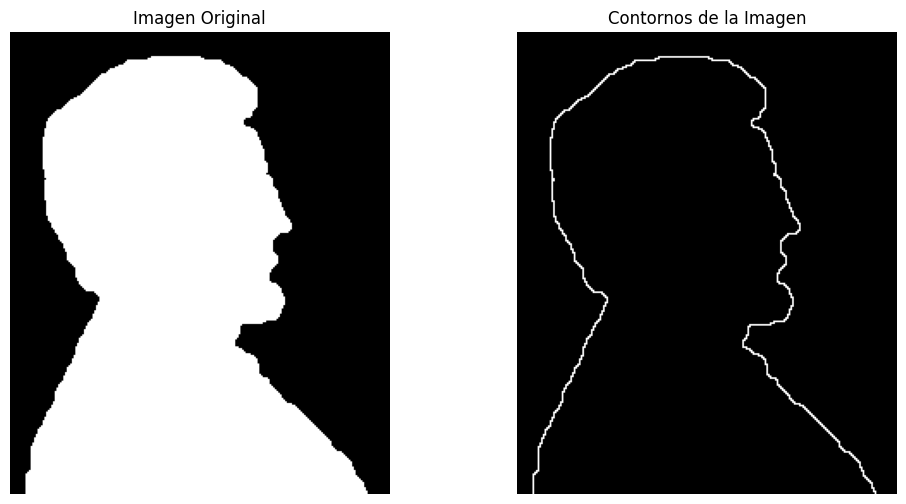

In [ ]:
lincoln = cv2.imread('Lincoln from penny.tif', 0)
kernel = np.ones((2, 2), np.uint8)

# Calculo del contorno en base a la inversa de la imagen
contorno = cv2.morphologyEx(cv2.bitwise_not(lincoln), cv2.MORPH_GRADIENT, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(lincoln, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contornos de la Imagen')
plt.imshow(contorno, cmap='gray')
plt.axis('off')
plt.show()

#5 - Investigación

## Thinning

El thinning es una ***técnica utilizada para reducir el grosor de los objetos en una imagen binaria***. Su objetivo principal es reducir la representación de un objeto a una línea de un solo píxel de ancho.

El proceso de thinning implica eliminar gradualmente píxeles de un objeto hasta que se logre la representación deseada. Sin embargo, es importante hacerlo de manera que se mantenga la estructura y las relaciones espaciales del objeto en la imagen.

Existen varios algoritmos de thinning disponibles que aplican reglas específicas para eliminar píxeles en iteraciones sucesivas hasta que se logra el adelgazamiento deseado. Uno de ellos es el de [Zhang-Suen](https://www.rosettacode.org/wiki/Zhang-Suen_thinning_algorithm).

In [ ]:
# Para mostrar el paso a paso interno
def aux_debug(img1, img2, img3, img4):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 4, 1)
  plt.title('erosionada')
  plt.imshow(img1, cmap='gray')
  plt.axis('off')

  plt.subplot(1, 4, 2)
  plt.title('dilatada')
  plt.imshow(img2, cmap='gray')
  plt.axis('off')

  plt.subplot(1, 4, 3)
  plt.title('diff')
  plt.imshow(img3, cmap='gray')
  plt.axis('off')

  plt.subplot(1, 4, 4)
  plt.title('skel')
  plt.imshow(img4, cmap='gray')
  plt.axis('off')
  plt.show()

In [ ]:
def thinning(image):
    size = np.size(image)
    skel = np.zeros(image.shape, np.uint8)  #Guarda el "esqueleto"

    kernel = np.array([[0,1,0],[1,1,1],[0,1,0]], np.uint8)  # Kernel para skeletonization
    done = False

    while not done:
      # Se erosionan los vertices de la imagen
      eroded = cv2.erode(image, kernel)
      temp = cv2.dilate(eroded, kernel)
      temp1 = cv2.subtract(image, temp)  # Nos quedamos con los vertices

      # Agregamos los puntos que son vertices al esqueleto
      skel = cv2.bitwise_or(skel, temp1)

      # Cortamos cuando hay cantidad de pixeles iguales al tamaño
      zeros = size - cv2.countNonZero(eroded)
      aux_debug(eroded,temp, temp1, skel)

      image = eroded.copy() # La nueva imagen ser la erosionada

      if zeros == size:
          done = True

    return skel

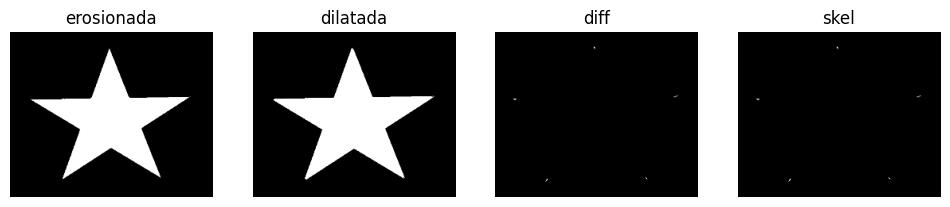

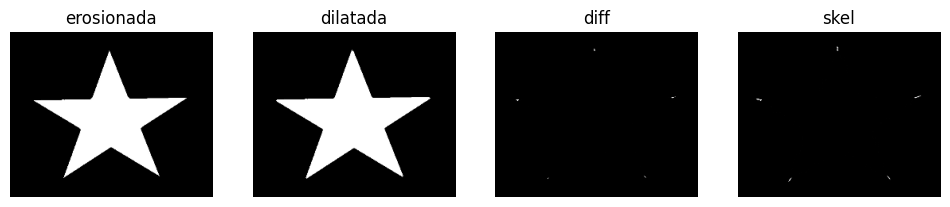

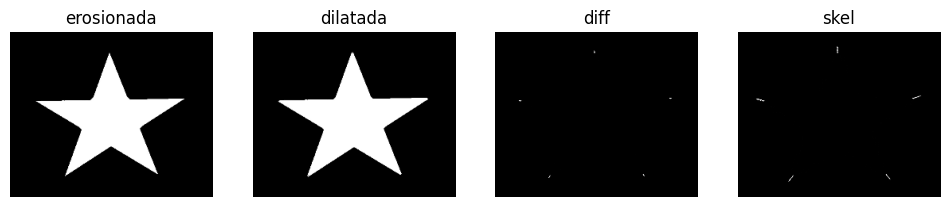

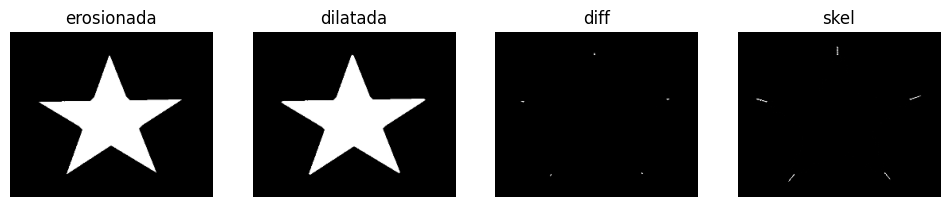

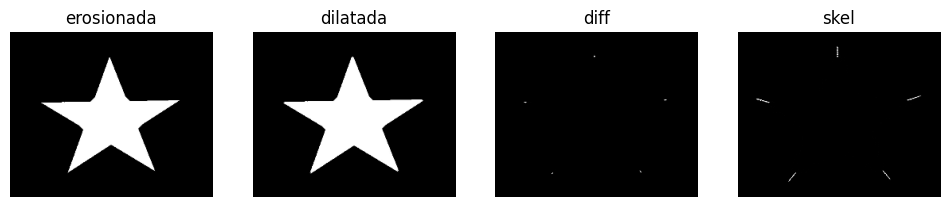

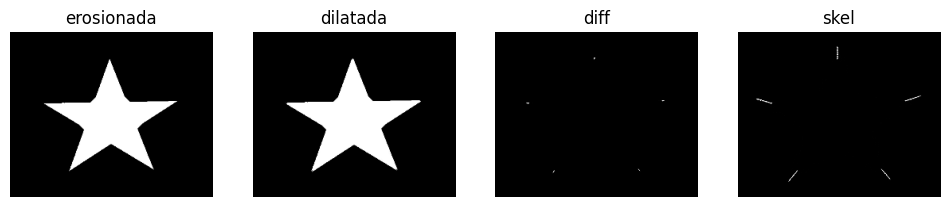

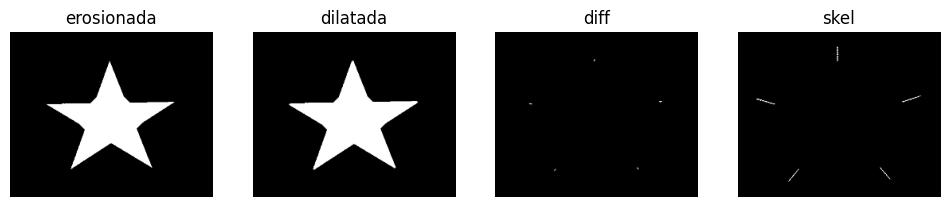

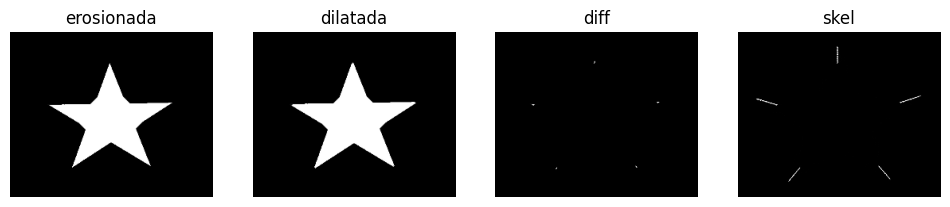

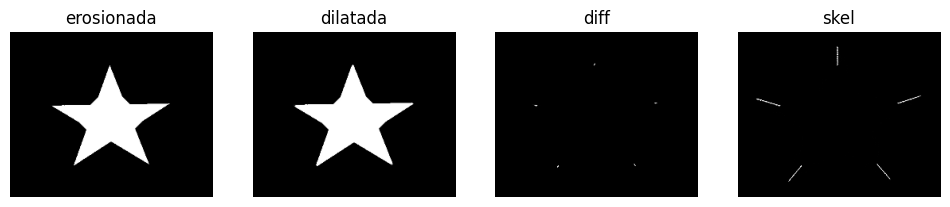

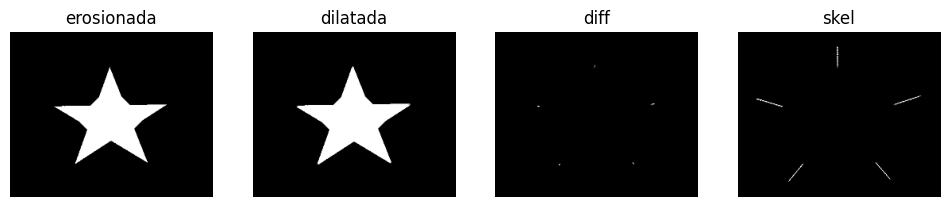

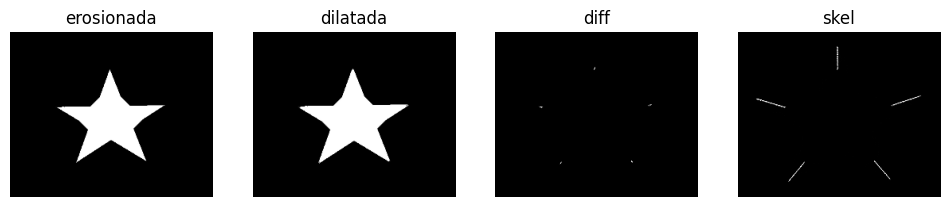

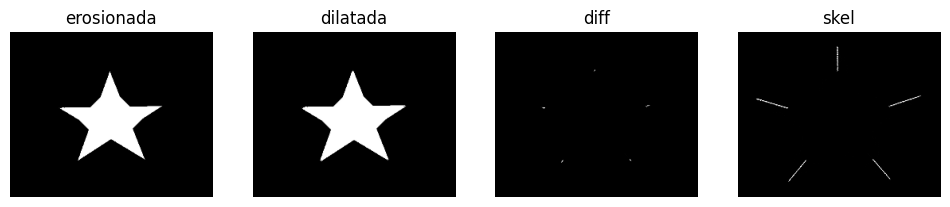

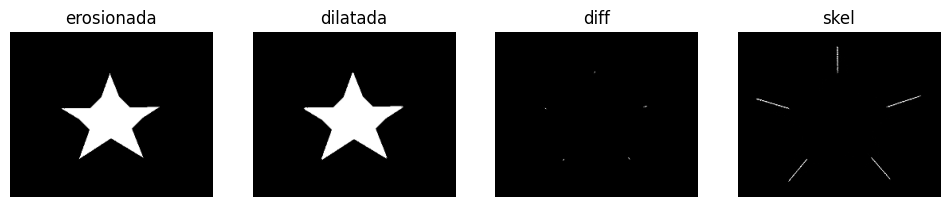

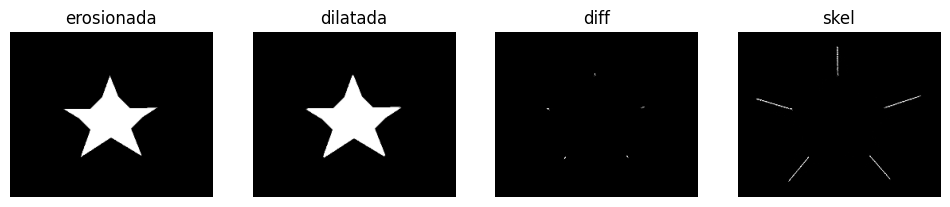

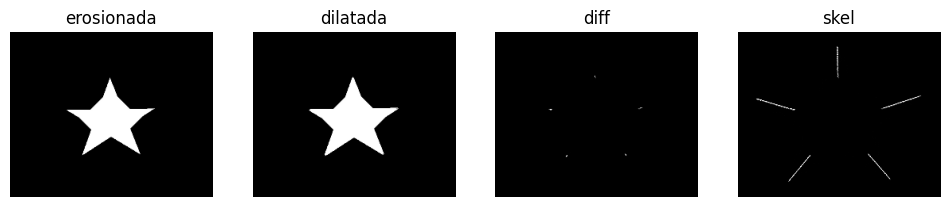

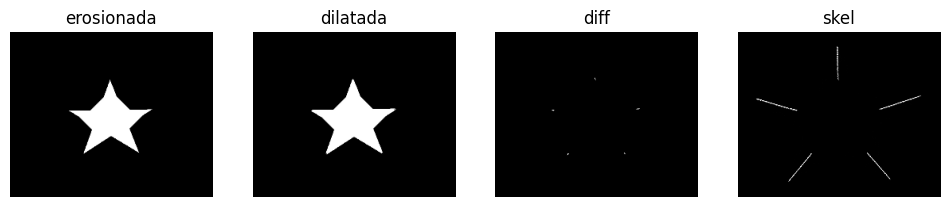

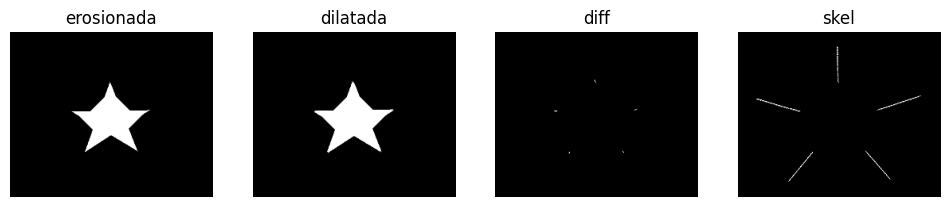

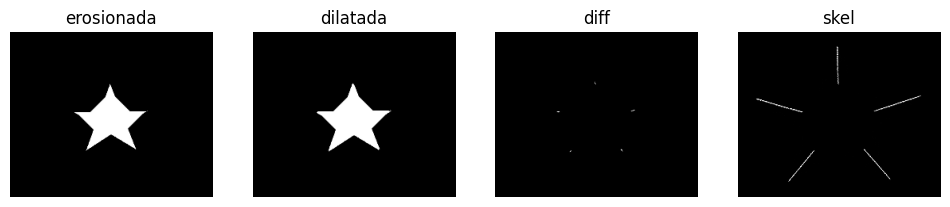

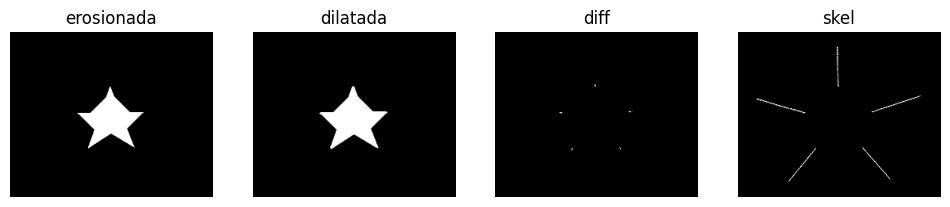

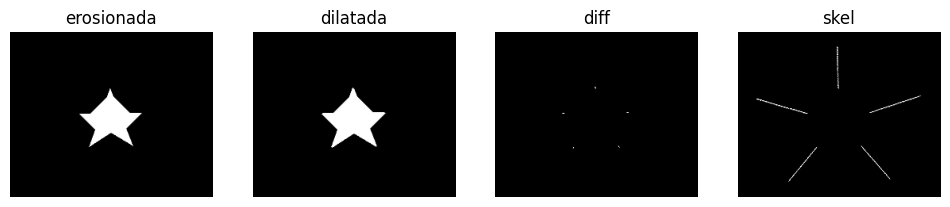

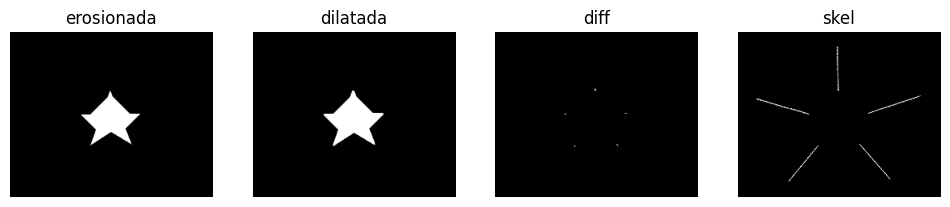

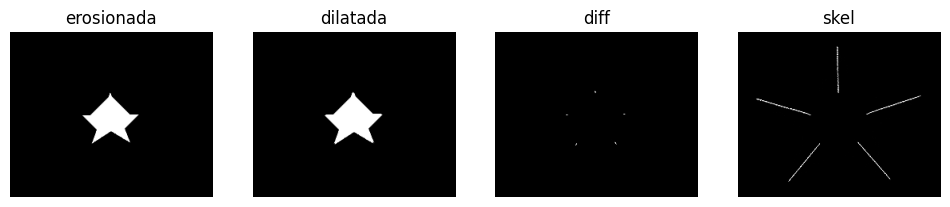

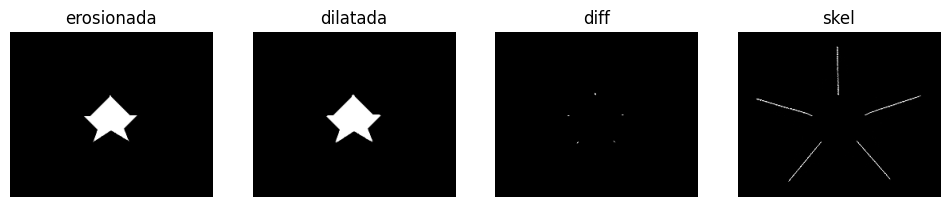

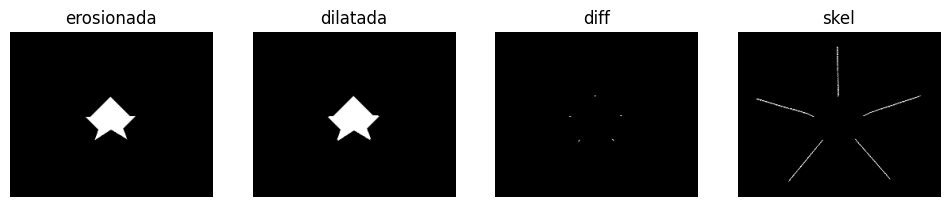

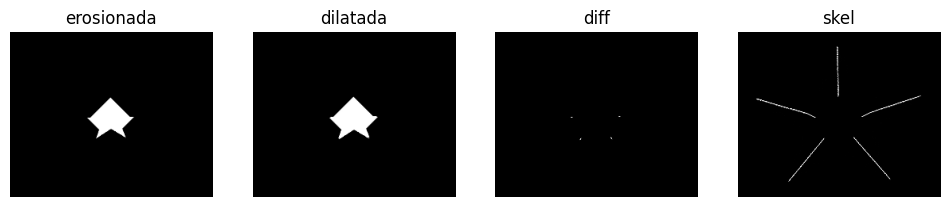

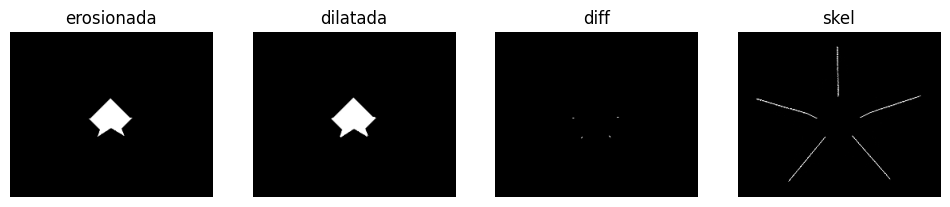

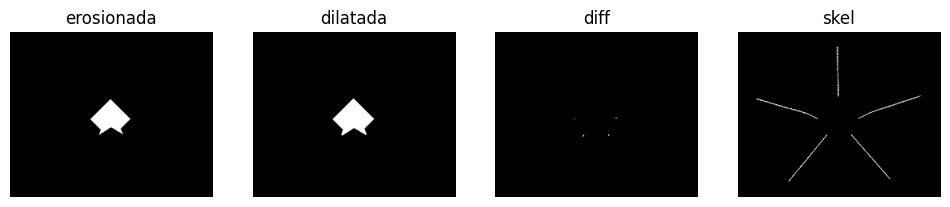

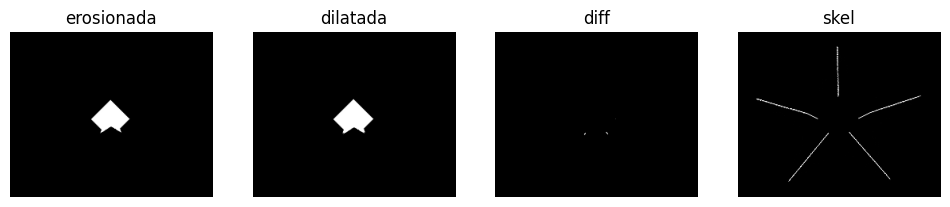

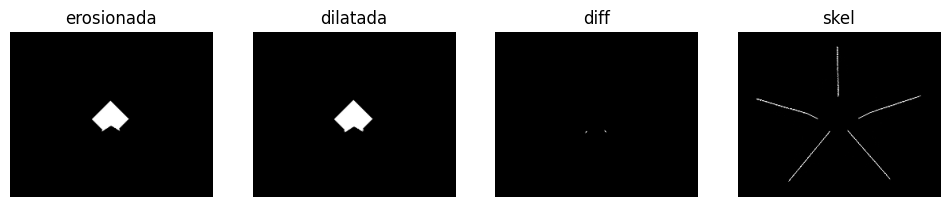

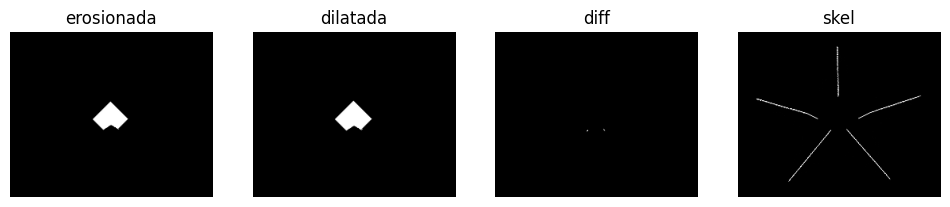

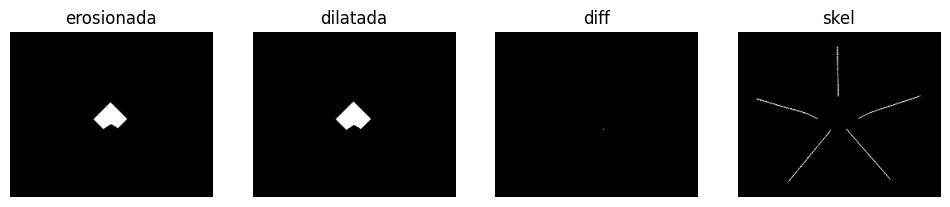

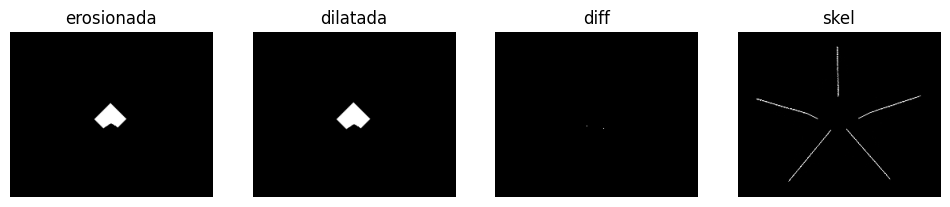

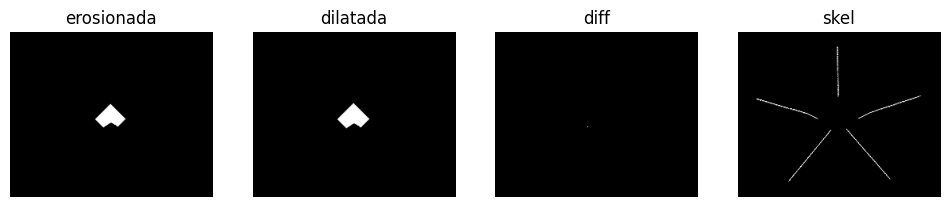

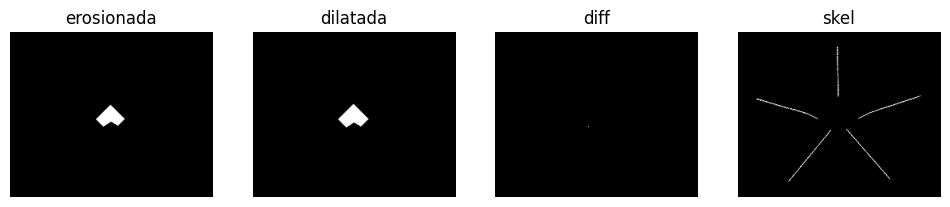

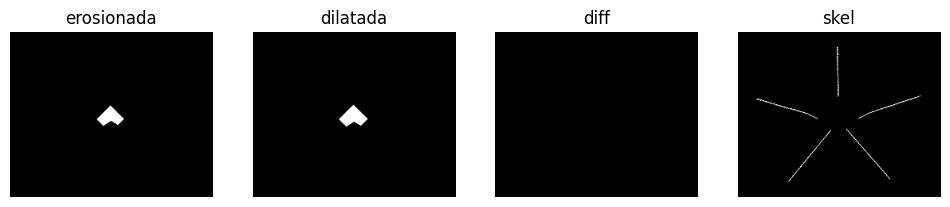

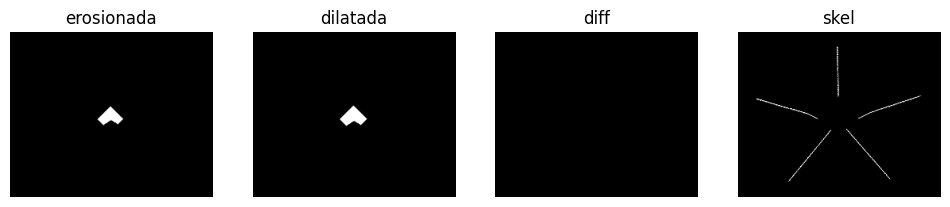

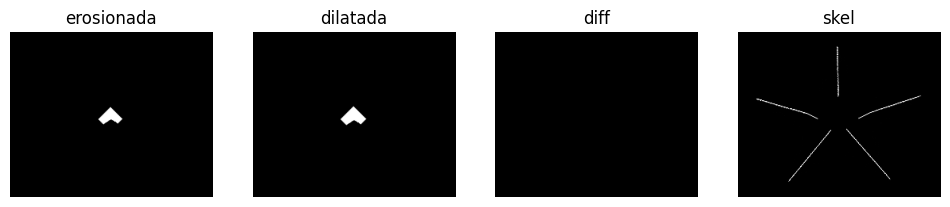

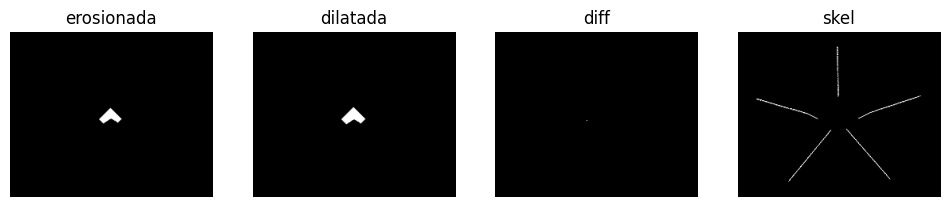

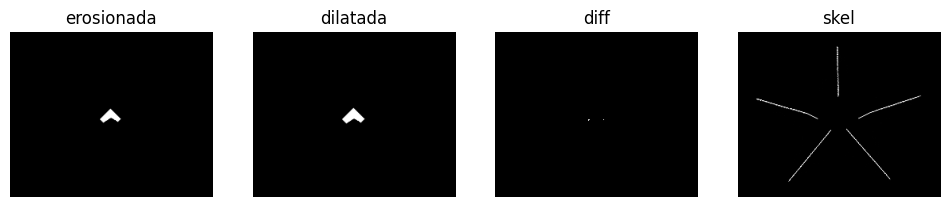

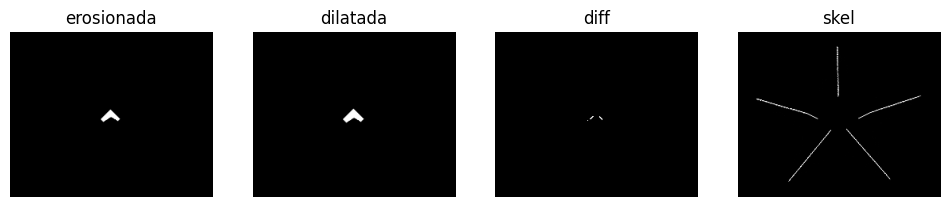

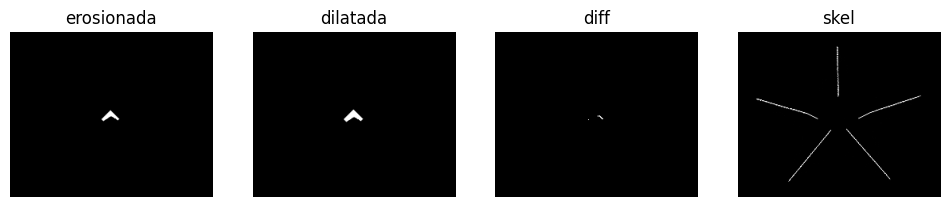

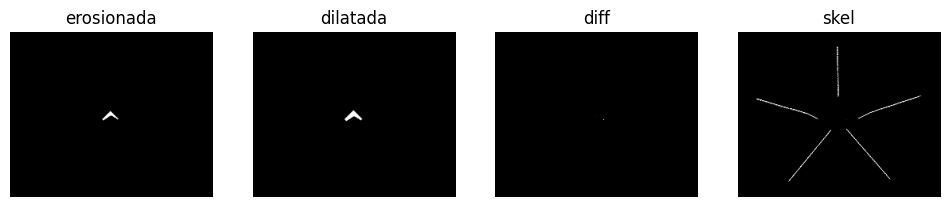

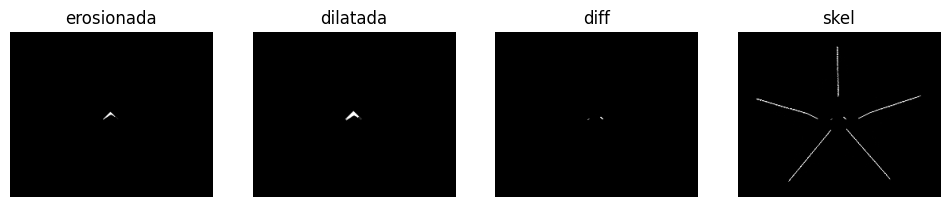

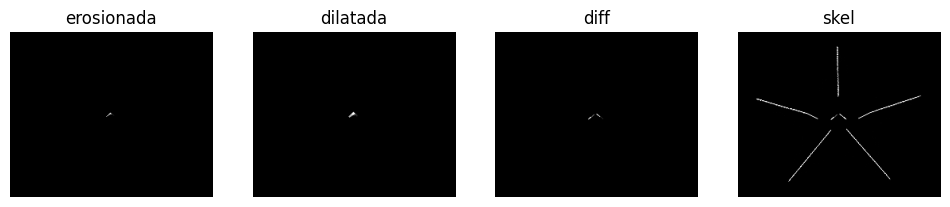

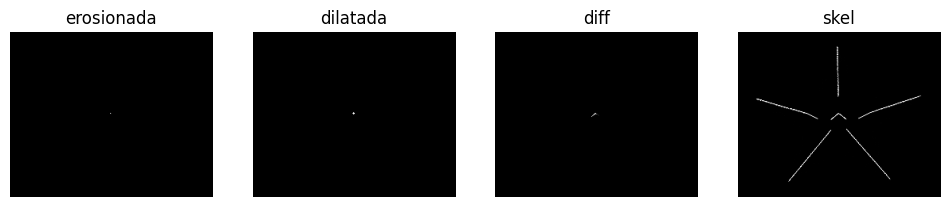

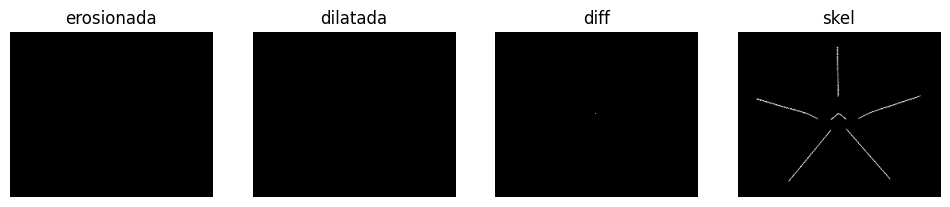

Resultado Final:


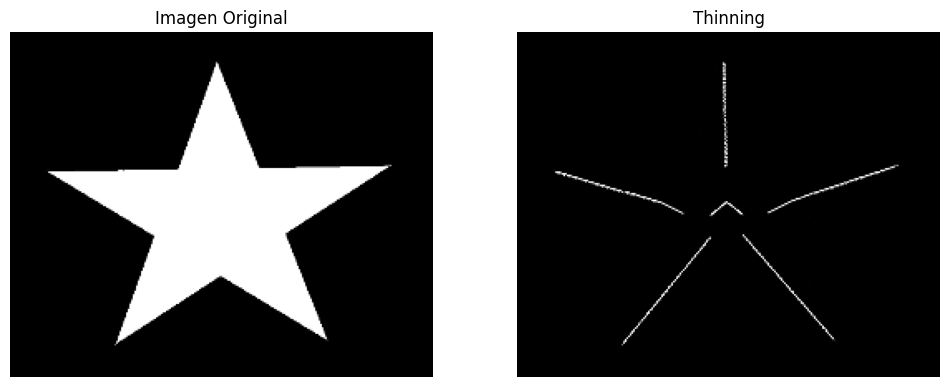

In [ ]:
star = cv2.imread('star.png', cv2.IMREAD_GRAYSCALE)
thinned = thinning(imagen)

print("Resultado Final:")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(star, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Thinning')
plt.imshow(thinned, cmap='gray')
plt.axis('off')
plt.show()

## Thickening

El thickening es el proceso inverso al adelgazamiento thinning. ***El thickening tiene como objetivo aumentar el grosor de los objetos manteniendo su topología y forma original.***

El proceso de engrosamiento implica la expansión de los objetos en una imagen binaria de manera controlada sin cambiar su estructura fundamental.

Al igual que con el adelgazamiento, existen varios algoritmos iterativos para el engrosamiento de objetos en una imagen binaria de manera controlada.



In [ ]:
def thickening(imagen_binaria, iteraciones=1):
    kernel1 = np.array([[1,1,0],[1,0,0],[1,0,0]], np.uint8) # Para engrosar a 45
    kernel2 = np.array([[0,1,1],[0,0,1],[0,0,1]], np.uint8) # Para engrosar a -45
    engrosada = imagen_binaria.copy()

    for i in range(iteraciones):
        engrosada = cv2.dilate(engrosada, kernel1, iterations=1)
        engrosada = cv2.dilate(engrosada, kernel2, iterations=1)
    return engrosada

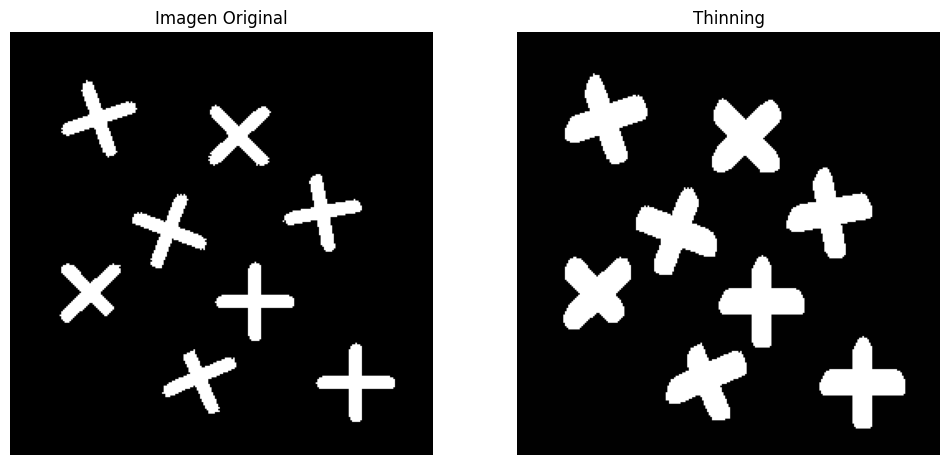

In [ ]:
crosses = cv2.imread('crosses.tiff', cv2.IMREAD_GRAYSCALE)
imagen_engrosada = thickening(crosses, iteraciones=2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(crosses, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Thinning')
plt.imshow(imagen_engrosada, cmap='gray')
plt.axis('off')
plt.show()

## Top-Hat Transform

La "Top-Hat Transform" es una ***operación morfológica utilizada para resaltar objetos que son más brillantes o más oscuros que su entorno***. Es útil para resaltar detalles finos y sutiles en una imagen.

La Top-Hat Transform se logra mediante la diferencia entre una imagen original y una imagen que ha sido sometida a una operación de apertura. La operación de Top-Hat se expresa matemáticamente como $T_h(f)=f-(f \circ b)$. Restar la imagen abierta de la imagen original revela las características pequeñas que se eliminaron durante la apertura, lo que resalta los detalles finos y sutiles.

In [ ]:
topHat = lambda img, kernel: cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

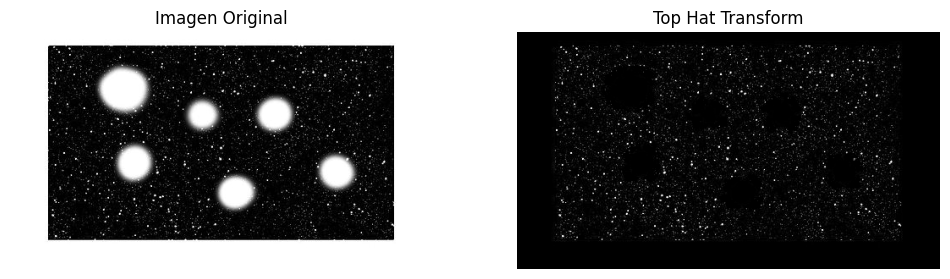

In [ ]:
cosmos = cv2.imread('Cosmos.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5), np.uint8)
top_hat=topHat(cosmos, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(cosmos, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Top Hat Transform')
plt.imshow(top_hat, cmap='gray')
plt.axis('off')
plt.show()

Podemos ver que los circulos brillantes de gran tamaño se ven eliminados dejando únicamente los detalles de menor tamaño.

## Hit and miss

"Hit and Miss" es una ***operación morfológica en el procesamiento de imágenes binarias que se utiliza para la detección de patrones específicos dentro de una imagen***. Esta operación es útil cuando se desea encontrar objetos que coinciden exactamente con un patrón dado en términos de píxeles activos (1) y píxeles inactivos (0).

La operación de "Hit and Miss" se basa en la convolución de la imagen de entrada con dos elementos estructurales, uno para representar el patrón que deseas encontrar y otro para representar su complemento. Los píxeles en la imagen de entrada que coinciden exactamente con el patrón deseado se conservan en la imagen resultante, mientras que los demás píxeles se vuelven inactivos (0).

En términos matemáticos, la operación "Hit-or-Miss" se expresa como: $H(f)= (f \ominus b) \cap (f^c \ominus b^c)$ donde b es el elemento estructural y $\ominus$ la operacion de erosion.

In [ ]:
def HitOrMiss(imagen, kernel, debug=False):
  ''' El kernel deberá tener 1's en donde se desea un hit,
  -1's donde se dea un miss y 0's donde se es indiferente'''

  #Hit
  k1 = np.array((kernel>0)*255, dtype=np.uint8)
  erosion = cv2.erode(imagen, k1)

  #Miss
  k2 = np.array((kernel<0)*255, dtype=np.uint8)
  erosion_comp = cv2.erode(cv2.bitwise_not(imagen), k2)

  return cv2.bitwise_and(erosion, erosion_comp) #intersección

def annotateValues(kernel):
  ''' Helper para escribir los valores internos del kernel'''
  for fila in range(alto):
    for columna in range(ancho):
        valor_pixel = kernel[fila, columna]
        plt.annotate(str(valor_pixel), xy=(columna, fila), color='red', fontsize=12,
                     ha='center', va='center')

El siguiente ejemplo muestra la detección de las esquinas internas superiores y derechas:

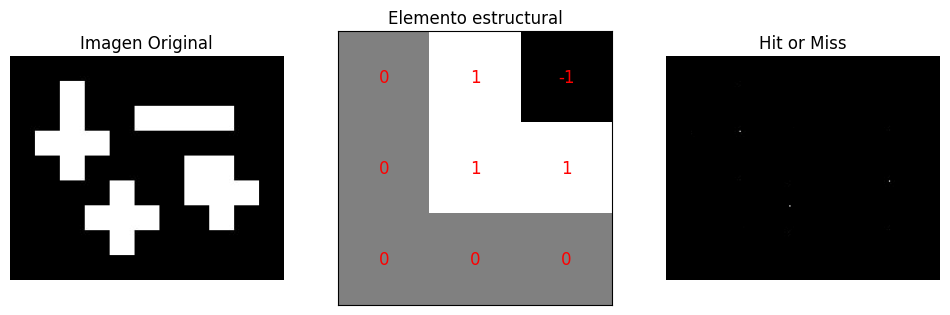

In [ ]:
imagen = cv2.imread('hitOrMiss.png', cv2.IMREAD_GRAYSCALE)
kernel = np.array([ [0, 1, -1],
                    [0, 1, 1],
                    [0, 0, 0]])

hitOrMiss = HitOrMiss(imagen, kernel, True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Elemento estructural')
plt.imshow(kernel, cmap='gray', vmin=-1, vmax=1)
annotateValues(kernel)
plt.xticks([]); plt.yticks([])

plt.subplot(1, 3, 3)
plt.title('Hit or Miss')
plt.imshow(hitOrMiss, cmap='gray')
plt.axis('off')

plt.show()

El siguiente ejemplo muestra la detección de las esquinas internas superiores izquierdas. Notar que la cruz derecha que tiene una deformacion y no tiene dicha esquina efectivamente no es detectada.

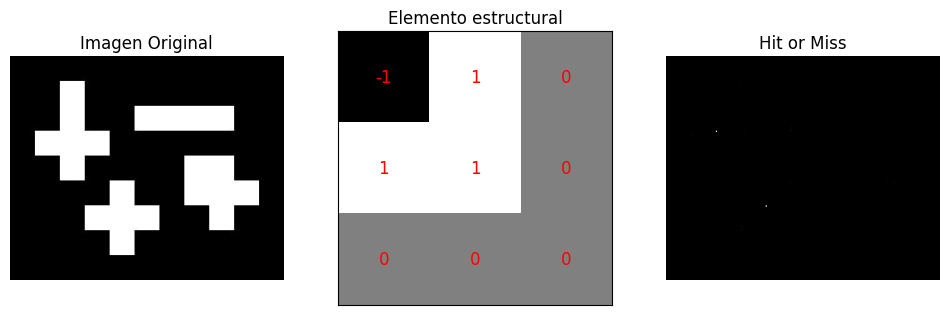

In [ ]:
imagen = cv2.imread('hitOrMiss.png', cv2.IMREAD_GRAYSCALE)
kernel = np.array([ [-1, 1, 0],
                    [1, 1, 0],
                    [0, 0, 0]])

hitOrMiss = HitOrMiss(imagen, kernel, True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Elemento estructural')
plt.imshow(kernel, cmap='gray', vmin=-1, vmax=1)
annotateValues(kernel)
plt.xticks([]); plt.yticks([])

plt.subplot(1, 3, 3)
plt.title('Hit or Miss')
plt.imshow(hitOrMiss, cmap='gray')
plt.axis('off')

plt.show()